# Do it yourself...

In this exercise, you'll perform backpropagation in a simple network, and you will python as a simple calculator.

# Notations
- $w_{ij}$: weight from neuron $i$ to neuron $j$ ($i$ and $j$ are on 2 successive layers).
- $o_i$: output of neuron $i$, after the activation function. 
- $i\to j$ means that $j$ is a direct successor of $i$, an input of $j$ is the output $o_i$ of neuron $i$, 
- $z_j$ is the input weighted sum $z_j = \sum_{i\to j} w_{ij} o_i$.
- The loss (the error $E$) is the quadratic function  $\frac{1}{2}(o_s - y)^2$ where $o_s$ is the output of the network.
- All neurons have a sigmoid activation function $$o_i=\sigma(z_i)=\frac{1}{1+e^{-z_i}}$$
- The derivative  $\sigma'(z)=\sigma(z)(1-\sigma(z))$, hence $\frac{\partial o_i}{\partial z_i}=o_i(1-o_i)$.
- The influence of a weight on the error can be calculated by:
$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial z_j}o_i$$
- which requires recursive calculation of:
$$\frac{\partial E}{\partial z_i}=o_i(1-o_i)\sum_{i\to j}\frac{\partial E}{\partial z_j}w_{ij}$$
- until the ouput layer: 
$$\frac{\partial E}{\partial z_i}=o_i(1-o_i)(o_i-y)$$

In [1]:
import numpy as np

In [2]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

Let us consider the network

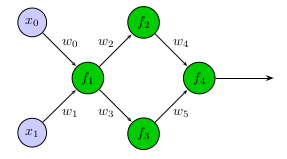


**Question** 
Let $\vec w = (1, .5, 0, 1, .5, .5)$ and $\vec x=(1, 2)$ and $y=1$. Compute `oi` the output of $f_i$. Compute `E` (half of) the quadratic error. 

In [35]:
w0, w1, w2, w3, w4, w5 = 1, 0.5, 0, 1, 0.5, 0.5
x0, x1 = 1, 2 
y = 1

o1 = sigmoide(x0*w0 + x1*w1) 
o2 = sigmoide(o1*w2)
o3 = sigmoide(o1*w3)
o4 = sigmoide(o2*w4 + o3*w5)

print(o1, o2, o3, o4)

0.8807970779778823 0.5 0.7069873680001046 0.6464551987154492


In [36]:
E = (o4 - y)**2 / 2
E

np.float64(0.06249696325766625)

**Question** Let `delta_wi` the python name for the partial derivatives $\frac{\partial E}{\partial w_i}$ and `delta_zi` the python name for $\frac{\partial E}{\partial z_i}$. Compute `delta_z4`

In [37]:
delta_z4 = o4*(1-o4)*(o4-y)
delta_z4

np.float64(-0.08080297360369353)

**Question** Now compute `delta_z3`

In [38]:
delta_z3 = o3*(1-o3)*(delta_z4*w5)
delta_z3

np.float64(-0.008369419671595497)

**Question** and `delta_z2`, `delta_z1`

In [39]:
delta_z2 = o2*(1-o2)*(delta_z4*w4)
delta_z2

np.float64(-0.01010037170046169)

In [40]:
delta_z1 = o1*(1-o1)*(delta_z2*w2 + delta_z3*w3)
delta_z1

np.float64(-0.0008787353790674501)

**Question** Compute `delta_wi` and the new weights of the network. Take a learning rate equal to 0.1.

In [41]:
lr = 0.1

delta_w5 = delta_z4*o3
delta_w4 = delta_z4*o2
delta_w3 = delta_z3*o1
delta_w2 = delta_z2*o1
delta_w1 = delta_z1*x1
delta_w0 = delta_z1*x0

w0 = w0 - lr * delta_w0
w1 = w1 - lr * delta_w1
w2 = w2 - lr * delta_w2
w3 = w3 - lr * delta_w3
w4 = w4 - lr * delta_w4
w5 = w5 - lr * delta_w5

print(w0, w1, w2, w3, w4, w5)

1.0000878735379068 0.5001757470758135 0.0008896377880257153 1.0007371760391113 0.5040401486801847 0.5057126681634657


*Indications*

Expected results
w0, w1, w2, w3, w4, w5

(1.0000878735379068,
 0.5001757470758135,
 0.0008896377880257153,
 1.0007371760391113,
 0.5040401486801847,
 0.5057126681634657)

Final error 0.06199499688155251



In [42]:
o1 = sigmoide(x0*w0 + x1*w1) 
o2 = sigmoide(o1*w2)
o3 = sigmoide(o1*w3)
o4 = sigmoide(o2*w4 + o3*w5)

E = (o4 - y)**2 / 2
E

np.float64(0.06199499688155251)